<a href="https://colab.research.google.com/github/mirpouya/TensorFlow-Tutorial/blob/main/Convolutional_Neural_Net_Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf   # model
import numpy as np    # math computation
import matplotlib.pyplot as plt   # visualization
import tensorflow_datasets as tfds    # tensorflow dataset

In [4]:
# loading the dataset
dataset, dataset_info = tfds.load("malaria")

ValueError: ignored

In [5]:
dataset, dataset_info = tfds.load("malaria", with_info=True)

In [6]:
dataset

{'train': <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [7]:
len(dataset)

1

In [8]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_path='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear i

the dataset is a dictionary of `train` and `label`

In [9]:
# seeing one sample
for data in dataset["train"].take(5):
  print(data)

{'image': <tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>}
{'image': <tf.Tensor: shape=(106, 121, 3), dtype=uint8, numpy=
array([[[0, 0, 0],

In [11]:
dataset, dataset_info = tfds.load("malaria", shuffle_files=True, as_supervised=True, with_info=True, split=["train", "test"])

ValueError: ignored

In [12]:
# in this dataset, as you can see in the dictionary we do not have test split
dataset, dataset_info = tfds.load("malaria", with_info=True, shuffle_files=True, as_supervised=True)

In [13]:
for data in dataset["train"].take(3):
  print(data)

(<tf.Tensor: shape=(145, 148, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(133, 127, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [14]:
# in this dataset, as you can see in the dictionary we do not have test split
dataset, dataset_info = tfds.load("malaria", with_info=True, shuffle_files=True, as_supervised=True, split=["train"])

In [15]:
print(len(dataset))

1


In [18]:
for data in dataset["train"].take(3):
  print(data)

TypeError: ignored

<b> it is very strange that after set `split=True` it is not iterable

In [19]:
# in this dataset, as you can see in the dictionary we do not have test split
dataset, dataset_info = tfds.load("malaria", with_info=True, shuffle_files=True, as_supervised=True, split=["train"])

In [20]:
# making validation and test section

dataset_t = tf.data.Dataset.range(10)
dataset_t = dataset_t.skip(7)
list(dataset_t.as_numpy_iterator())

[7, 8, 9]

In [21]:
dataset_t = tf.data.Dataset.range(10)
dataset_t = dataset_t.skip(4)
list(dataset_t.as_numpy_iterator())

[4, 5, 6, 7, 8, 9]

<b> Determining rario of `train`, `validation`, and `test` </b>

In [22]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(dataset)
print(DATASET_SIZE)

1


<b> it is also very very strange that `len(dataset)` is 1 </b>

In [23]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(dataset_t)
print(DATASET_SIZE)

dataset_t = tf.data.Dataset.range(20)
train_data_t = dataset_t.take(int(TRAIN_RATIO * DATASET_SIZE))
val_data_t = dataset_t.skip(int(TRAIN_RATIO * DATASET_SIZE)).take(int(VAL_RATIO * DATASET_SIZE))
test_data_t = dataset_t.skip(int((TRAIN_RATIO + VAL_RATIO) * DATASET_SIZE))

6


In [24]:
print(f"train_data_t length: {len(train_data_t)}")
print(f"val_data_t length: {len(val_data_t)}")
print(f"train_data_t length: {len(test_data_t)}")

train_data_t length: 4
val_data_t length: 0
train_data_t length: 15


<b> We do the `splitting` with ` spits(DATASET, TRAIN_RATIO, VAL_RATIO, TEST_RATIO) ` function </b>

In [25]:
dataset, dataset_info = tfds.load("malaria", with_info=True, shuffle_files=True, as_supervised=True, split=["train"])

In [32]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATASET_SIZE = len(dataset)
  # print(f"data set size: {DATASET_SIZE}")

  train_dataset = dataset.take(int(TRAIN_RATIO * DATASET_SIZE))
  # print(f"train dataset: {train_dataset}")

  val_dataset = dataset.skip(int(TRAIN_RATIO * DATASET_SIZE)).take(int(VAL_RATIO * DATASET_SIZE))
  # print(f"val dataset: {val_dataset}")

  test_dataset = dataset.skip(int((TRAIN_RATIO + VAL_RATIO) * DATASET_SIZE))
  # print(f"test_dataset: {val_dataset}")

  return train_dataset, val_dataset, test_dataset

In [35]:
# testing the function

d_test = tf.data.Dataset.range(20)

d_train, d_val, d_test = splits(d_test, 0.7, 0.2, 0.1)

print(d_train)
print(d_val)
print(d_test)

<_TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_SkipDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>


In [40]:
print(list(d_train.as_numpy_iterator()))
print(list(d_val.as_numpy_iterator()))
print(list(d_test.as_numpy_iterator()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[14, 15, 16, 17]
[18, 19]


<b> back to the original dataset </b>

In [44]:
dataset[0]

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [45]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_path='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear i

In [46]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(dataset)

In [48]:
train_dataset, val_dataset, test_dateset = splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO)

AttributeError: ignored

In [49]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

the datast is composed of different parts, its a list of different parts, then we need to pick the data section

In [51]:
train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)

In [53]:
print(list(train_dataset.take(1).as_numpy_iterator()))
print(list(val_dataset.take(1).as_numpy_iterator()))
print(list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)]
[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

<h2> <b> Data Visualization </b> </h2>

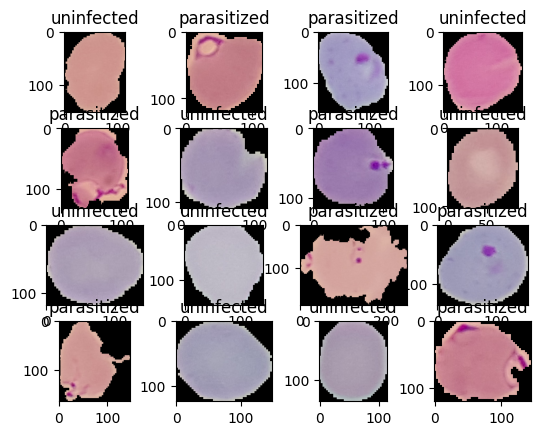

In [58]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  plt.subplot(4, 4, i+1)
  plt.imshow(image)
  plt.title(dataset_info.features["label"].int2str(label))

<h2> <b> Data Preprocessing <b> </h2>

resizing images to make all the images of the dataset of the same size and compatible to the input of the model

In [62]:
IM_SIZE = 224

def resizing(image, label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE)), label

In [63]:
train_dataset = train_dataset.map(resizing)

In [64]:
for image, label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [66]:
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)